In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2025-04-24 18:44:57.460451: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-24 18:44:57.470441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-24 18:44:57.481335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-24 18:44:57.484289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-24 18:44:57.493949: I tensorflow/core/platform/cpu_feature_guar

Task: Build an Artificial Neural Network to identify the customers who will be leaving the bank, based on the data of all customers over the past three months. 

Task A: 
•Load the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


•Drop the customers' personal data columns that will not be useful for analysis. (Hint: First three columns)

In [5]:
df.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


•Prepare independent variables X and dependent variable Y (Exited). 

In [8]:
X = df.drop('Exited', axis=1)
y = df['Exited']

•LabelEncode the Gender column

In [9]:
encoder = LabelEncoder()
X['Gender'] = encoder.fit_transform(X['Gender'])

•OneHotEncode the Geography column

In [10]:
X = pd.get_dummies(X, columns=['Geography'], drop_first=False).astype(int)

•Perform a train test split in the ratio 80:20 and random_state 0

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state=0)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build a Keras Sequential model with the following layers:

•Dense layer with 6 neurons and activation relu

•Dense layer with 1 neuron and activation sigmoid

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(6, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

•Compile the model with Adam optimizer, binary_crossentropy loss and metric accuracy

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

•Train the model for 10 epochs and batch size 10

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.8033 - loss: 0.6066
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7855 - loss: 0.5333
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8019 - loss: 0.4891
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8016 - loss: 0.4769
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7967 - loss: 0.4733
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.7907 - loss: 0.4612
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.8003 - loss: 0.4423
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8102 - loss: 0.4229
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8225 - loss: 0.3978
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8297 - loss: 0.4098


•Evaluate the model on the test set; print the accuracy and confusion matrix

In [16]:
model.evaluate(X_test,  y_test, verbose=2)

250/250 - 0s - 742us/step - accuracy: 0.8189 - loss: 0.4000


[0.4000084400177002, 0.8188750147819519]

In [17]:
y_pred = model.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


In [18]:
accuracy = accuracy_score(y_test, y_pred.astype(int))
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


Confusion Matrix:
[[6364    0]
 [1636    0]]


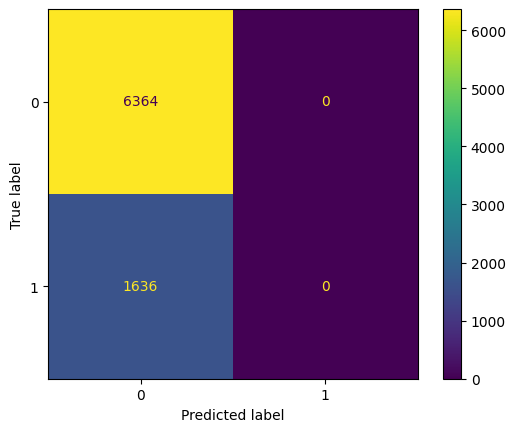

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred.astype(int))
print("Confusion Matrix:")
print(conf_matrix)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
# display matrix
cm_display.plot()
plt.show()

Task B:

•Use the built ANN model to predict if the customer with the following information will leave the bank:

• Geography: France

• Credit Score: 600

• Gender: Male

• Age: 40 years

• Tenure: 3 years

• Balance: $60000

• Number of Products: 2

• Does this customer have a credit card? Yes

• Is this customer an Active Member: Yes

• Estimated Salary: $50000

So, should we let the customer go?

In [20]:
X_test_person = {
'CreditScore': 600,
'Gender': 1,
'Age': 40,
'Tenure': 3,
'Balance': 60000,
'NumOfProducts': 2,
'HasCrCard': 1,
'IsActiveMember': 1,
'EstimatedSalary': 50000,
'Geography_France': 1,
'Geography_Germany': 0,
'Geography_Spain': 0,
}

X_test_person = pd.DataFrame([X_test_person])

In [21]:
X_test_person_scaled = scaler.transform(X_test_person)

In [22]:
y_pred_person = model.predict(X_test_person_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [23]:
print(f"Predicted probability of exiting: {y_pred_person[0][0]}")

Predicted probability of exiting: 0.08492105454206467
